# **1. Import Data and Libraries**

In [ ]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

movie_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Final Project/netflix-rotten-tomatoes-metacritic-imdb.csv') # import the dataset

In [ ]:
movie_set.head(10)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,NaN,NaN
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307482,https://www.imdb.com/title/tt1973421,An enigmatic commissioner joins the Warsaw Pol...,107.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BZWYyYW...,NaN,NaN
8,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker strugglin

In [ ]:
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

# 1. Data Preprocessing

In [ ]:
# remove duplicate data
movie_set.drop_duplicates(inplace = True)

In [ ]:
# drop columns with 30% or more missing data
missing_data = (movie_set.isnull().sum() / len(movie_set)) * 100 # calculate the percentage of missing data in the columns
columns_missing_data = missing_data[missing_data >= 30].index # store those with more than 30% missing data in a variable
movie_set.drop(columns = columns_missing_data, inplace = True) # drop the columns with more than 30% missing data

In [ ]:
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 13770 non-null  object 
 2   Tags                  15413 non-null  object 
 3   Languages             13545 non-null  object 
 4   Series or Movie       15480 non-null  object 
 5   Hidden Gem Score      13379 non-null  float64
 6   Country Availability  15461 non-null  object 
 7   Runtime               15479 non-null  object 
 8   Writer                11150 non-null  object 
 9   Actors                13555 non-null  object 
 10  IMDb Score            13381 non-null  float64
 11  Release Date          13373 non-null  object 
 12  Netflix Release Date  15480 non-null  object 
 13  Netflix Link          15480 non-null  object 
 14  IMDb Link             13177 non-null  object 
 15  Summary            

In [ ]:
# grouped all columns with non-numeric values and are objects
object_streaming = movie_set.select_dtypes(exclude = ['int', 'float']).columns
object_streaming = movie_set[object_streaming]
object_streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 15480 non-null  object
 1   Genre                 13770 non-null  object
 2   Tags                  15413 non-null  object
 3   Languages             13545 non-null  object
 4   Series or Movie       15480 non-null  object
 5   Country Availability  15461 non-null  object
 6   Runtime               15479 non-null  object
 7   Writer                11150 non-null  object
 8   Actors                13555 non-null  object
 9   Release Date          13373 non-null  object
 10  Netflix Release Date  15480 non-null  object
 11  Netflix Link          15480 non-null  object
 12  IMDb Link             13177 non-null  object
 13  Summary               15471 non-null  object
 14  Image                 15480 non-null  object
 15  Poster                11842 non-null

In [ ]:
# imputed the non numeric values using most_frequent ie. to fill in with the most appearing
imp = SimpleImputer(strategy = 'most_frequent')
object_streaming['Tags'] = imp.fit_transform(object_streaming[['Tags']])
object_streaming['Genre'] = imp.fit_transform(object_streaming[['Genre']])
object_streaming['Languages'] = imp.fit_transform(object_streaming[['Languages']])
object_streaming['Runtime'] = imp.fit_transform(object_streaming[['Runtime']])
object_streaming['Writer'] = imp.fit_transform(object_streaming[['Writer']])
object_streaming['Actors'] = imp.fit_transform(object_streaming[['Actors']])
object_streaming['Release Date'] = imp.fit_transform(object_streaming[['Release Date']])
object_streaming['Genre'] = imp.fit_transform(object_streaming[['Genre']])
object_streaming.info()

<ipython-input-9-00590d2dc204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_streaming['Tags'] = imp.fit_transform(object_streaming[['Tags']])
<ipython-input-9-00590d2dc204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_streaming['Genre'] = imp.fit_transform(object_streaming[['Genre']])
<ipython-input-9-00590d2dc204>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 15480 non-null  object
 1   Genre                 15480 non-null  object
 2   Tags                  15480 non-null  object
 3   Languages             15480 non-null  object
 4   Series or Movie       15480 non-null  object
 5   Country Availability  15461 non-null  object
 6   Runtime               15480 non-null  object
 7   Writer                15480 non-null  object
 8   Actors                15480 non-null  object
 9   Release Date          15480 non-null  object
 10  Netflix Release Date  15480 non-null  object
 11  Netflix Link          15480 non-null  object
 12  IMDb Link             13177 non-null  object
 13  Summary               15471 non-null  object
 14  Image                 15480 non-null  object
 15  Poster                11842 non-null

In [ ]:
#we will be dropping this because they will not be needed in our recommender system.Moreover, these are features that will be difficult to impute.
object_streaming.drop('IMDb Link', axis = 1, inplace = True)
object_streaming.drop('Poster', axis = 1, inplace = True)
object_streaming.drop('Tags', axis = 1, inplace = True)

<ipython-input-10-78f8432adfd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_streaming.drop('IMDb Link', axis = 1, inplace = True)
<ipython-input-10-78f8432adfd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_streaming.drop('Poster', axis = 1, inplace = True)
<ipython-input-10-78f8432adfd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_streaming.drop('Tags', axis = 1, inplace = True)


In [ ]:
object_streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 15480 non-null  object
 1   Genre                 15480 non-null  object
 2   Languages             15480 non-null  object
 3   Series or Movie       15480 non-null  object
 4   Country Availability  15461 non-null  object
 5   Runtime               15480 non-null  object
 6   Writer                15480 non-null  object
 7   Actors                15480 non-null  object
 8   Release Date          15480 non-null  object
 9   Netflix Release Date  15480 non-null  object
 10  Netflix Link          15480 non-null  object
 11  Summary               15471 non-null  object
 12  Image                 15480 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [ ]:
#this is to store all columns that have int or float as their datatypes
numeric_streaming = movie_set.select_dtypes(include = ['int', 'float']).columns
numeric_streaming = movie_set[numeric_streaming]
numeric_streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hidden Gem Score  13379 non-null  float64
 1   IMDb Score        13381 non-null  float64
 2   IMDb Votes        13379 non-null  float64
dtypes: float64(3)
memory usage: 483.8 KB


In [ ]:
# we will now impute these features using the mean method
imp = SimpleImputer(strategy = 'mean')
numeric_streaming['IMDb Score'] = imp.fit_transform(numeric_streaming[['IMDb Score']])
numeric_streaming['IMDb Votes'] = imp.fit_transform(numeric_streaming[['IMDb Votes']])
numeric_streaming['Hidden Gem Score'] = imp.fit_transform(numeric_streaming[['Hidden Gem Score']])
numeric_streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hidden Gem Score  15480 non-null  float64
 1   IMDb Score        15480 non-null  float64
 2   IMDb Votes        15480 non-null  float64
dtypes: float64(3)
memory usage: 483.8 KB


<ipython-input-13-513b297d923c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_streaming['IMDb Score'] = imp.fit_transform(numeric_streaming[['IMDb Score']])
<ipython-input-13-513b297d923c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_streaming['IMDb Votes'] = imp.fit_transform(numeric_streaming[['IMDb Votes']])
<ipython-input-13-513b297d923c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
streaming_data = pd.DataFrame()
streaming_data = pd.concat([object_streaming, numeric_streaming], axis = 1)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 15480 non-null  object 
 2   Languages             15480 non-null  object 
 3   Series or Movie       15480 non-null  object 
 4   Country Availability  15461 non-null  object 
 5   Runtime               15480 non-null  object 
 6   Writer                15480 non-null  object 
 7   Actors                15480 non-null  object 
 8   Release Date          15480 non-null  object 
 9   Netflix Release Date  15480 non-null  object 
 10  Netflix Link          15480 non-null  object 
 11  Summary               15471 non-null  object 
 12  Image                 15480 non-null  object 
 13  Hidden Gem Score      15480 non-null  float64
 14  IMDb Score            15480 non-null  float64
 15  IMDb Votes         

In [ ]:
streaming_data.dropna(how='any', inplace = True)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15452 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15452 non-null  object 
 1   Genre                 15452 non-null  object 
 2   Languages             15452 non-null  object 
 3   Series or Movie       15452 non-null  object 
 4   Country Availability  15452 non-null  object 
 5   Runtime               15452 non-null  object 
 6   Writer                15452 non-null  object 
 7   Actors                15452 non-null  object 
 8   Release Date          15452 non-null  object 
 9   Netflix Release Date  15452 non-null  object 
 10  Netflix Link          15452 non-null  object 
 11  Summary               15452 non-null  object 
 12  Image                 15452 non-null  object 
 13  Hidden Gem Score      15452 non-null  float64
 14  IMDb Score            15452 non-null  float64
 15  IMDb Votes         

In [ ]:
streaming_data.to_csv('Movie_data.csv', index = False)

In [ ]:
#this column extracts the primary gender for the gender column
streaming_data['Genre'] = streaming_data['Genre'].str.replace(r'[', '').str.replace(r"'", '').str.replace(r']', '').str.split(',').str[0]

<ipython-input-16-51cc766f3db2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  streaming_data['Genre'] = streaming_data['Genre'].str.replace(r'[', '').str.replace(r"'", '').str.replace(r']', '').str.split(',').str[0]


# **3.Exploratory Data Analysis**

In [ ]:
#Description
streaming_data.describe()

,Hidden Gem Score,IMDb Score,IMDb Votes
count,15452.000000,15452.000000,1.545200e+04
mean,5.937882,6.496352,4.268121e+04
std,2.091855,1.066307,1.166416e+05
min,0.600000,1.000000,5.000000e+00
25%,4.000000,6.000000,5.527500e+02
50%,6.000000,6.496054,4.108000e+03
75%,7.800000,7.200000,4.272841e+04
max,9.800000,9.700000,2.354197e+06


# **EDA on StreamingMovies**

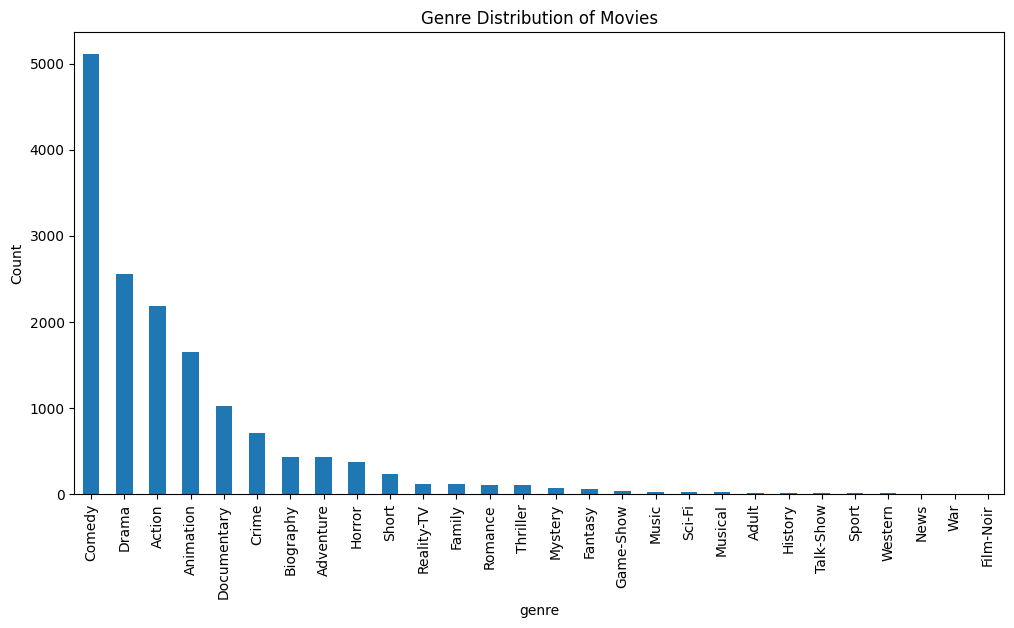

In [ ]:
#Distribution of Genre
genre_count=streaming_data['Genre'].value_counts()
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre Distribution of Movies')
plt.xlabel('genre')
plt.ylabel('Count')
plt.show()

This bar chart shows us the genres which are more prevalent in the dataset. From above we can see that the comedy genre is the leading genre and has a higher popularity. This is followed by drama and action and it can also be seen that talk-shows,Adult,Reality,western,sports,etc have lesser popularity.

In [ ]:
import plotly.graph_objects as go

count = streaming_data['Series or Movie'].value_counts()


fig = go.Figure(data=[go.Bar(
    x=streaming_data["Series or Movie"],
    y=count,
    text=count,
    textposition='auto',

)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title_text='Comparison between Movie and Series in the dataset',
    uniformtext_minsize=8, uniformtext_mode='hide',
    barmode='group', xaxis_tickangle=-45,
    yaxis=dict(title='Quantity', titlefont_size=14),
    xaxis=dict(title='Category', titlefont_size=14)
)

# Show the plot
fig.show()

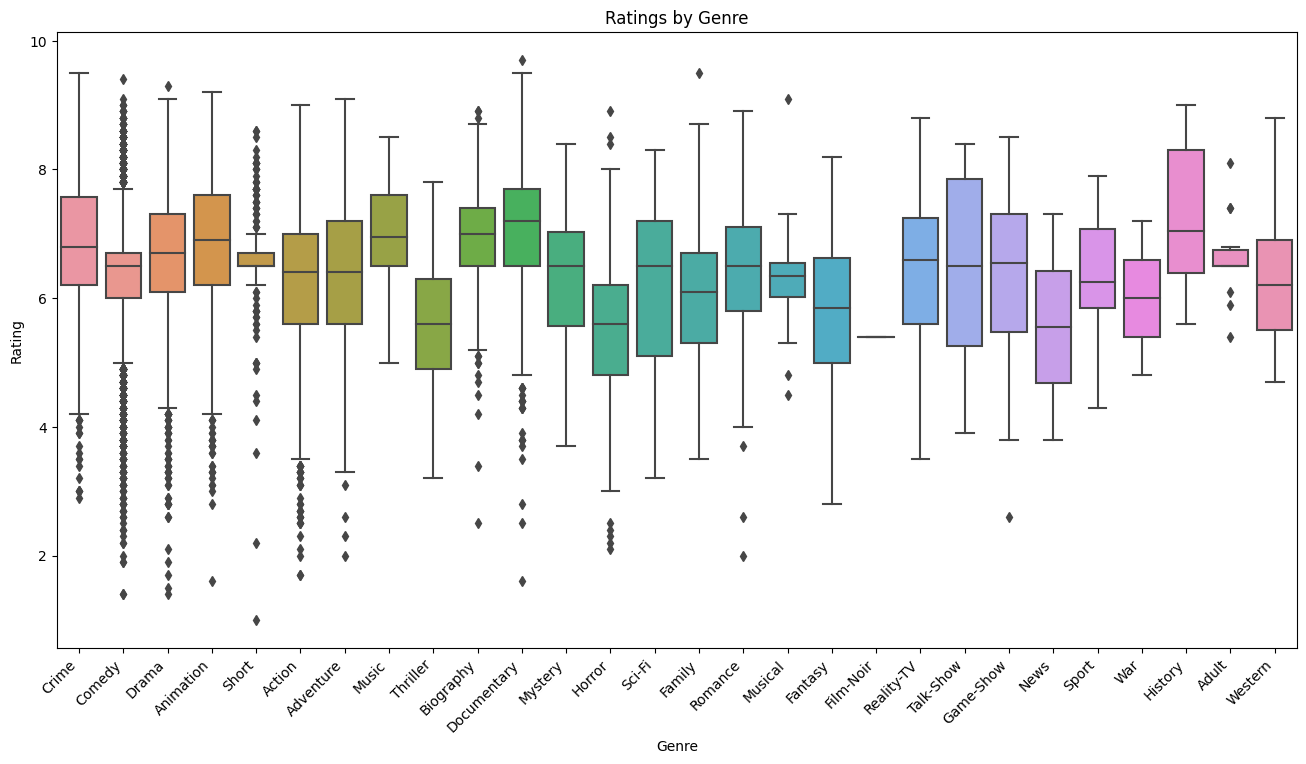

In [ ]:
#We will create a boxplot to analyze our genres
plt.figure(figsize=(16,8))
sns.boxplot(x='Genre', y='IMDb Score',data=streaming_data)
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45,ha='right')#helps readability by rotating the x-axis labels
plt.show()

<ipython-input-21-27e13c501297>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



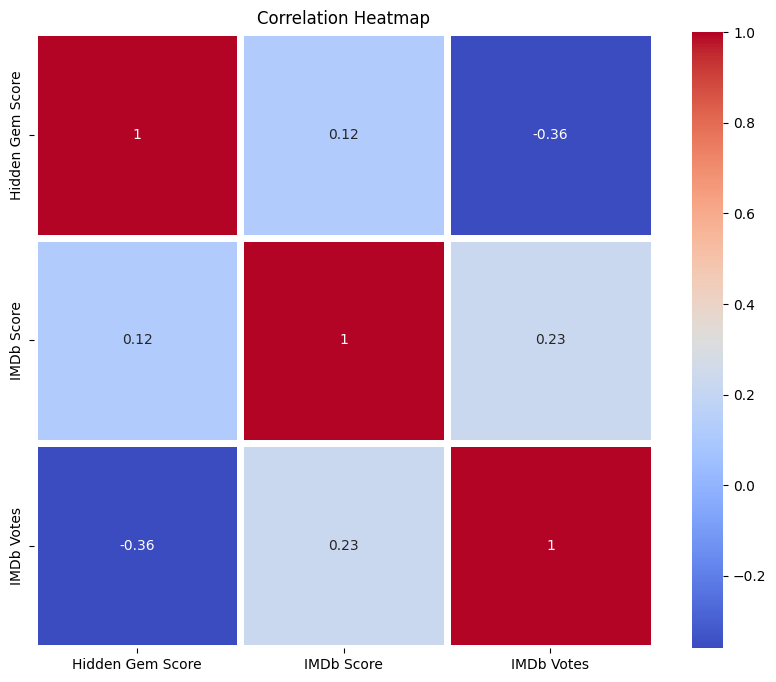

In [ ]:
#Correlation HeatMap
correlation_mat=streaming_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat,annot=True,cmap='coolwarm',linewidths=5)
plt.title('Correlation Heatmap')
plt.show()

The above correlation map is what we are using to understand the relationship between the different variables in the dataset,streaming_movies. The diagonal line, red indicates a perfect correlation between the variable and itself.

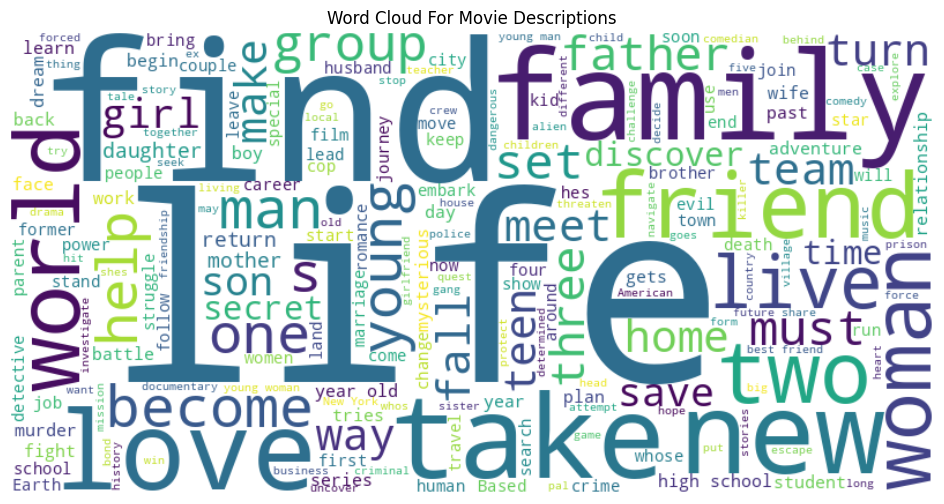

In [ ]:
#One important aspect of the movie recommender system is the description feature. Using a word cloud helps us provide a visual representation of most occurring words which can help identify common themes in movies.
#since we will be using a content-based recommender , it will be beneficial to have a look at the most appeared words in our descriptions
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(streaming_data['Summary'].dropna()))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For Movie Descriptions')
plt.show()

In word clouds the size of each word indicates the frequency. Here we can see that most visible ones are the ones with larger fonts which are find , life, family. This indicates that these are words with high frequency and the smaller words are less common in our movie descriptions.

# **4. Building the Movie Recommender System**

In [ ]:
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15452 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15452 non-null  object 
 1   Genre                 15452 non-null  object 
 2   Languages             15452 non-null  object 
 3   Series or Movie       15452 non-null  object 
 4   Country Availability  15452 non-null  object 
 5   Runtime               15452 non-null  object 
 6   Writer                15452 non-null  object 
 7   Actors                15452 non-null  object 
 8   Release Date          15452 non-null  object 
 9   Netflix Release Date  15452 non-null  object 
 10  Netflix Link          15452 non-null  object 
 11  Summary               15452 non-null  object 
 12  Image                 15452 non-null  object 
 13  Hidden Gem Score      15452 non-null  float64
 14  IMDb Score            15452 non-null  float64
 15  IMDb Votes         

In [ ]:
#import the NLTK library
import nltk
nltk.download('stopwords') # download stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#we will now create a TfidfVectorizer with english words removed and we will fit and transform our movie descriptions into Tf-idf vectors
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorized_streamingdata = vectorizer.fit_transform(streaming_data['Summary'])

More indepthly, the Tf-idf values of the words in the descriptions will be computed.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# thepourpose of the cosine similarity here is to calculate the similarity between the Tf-idf vectors in our vectorized movie dataset.
streaming_similarity = cosine_similarity(vectorized_streamingdata, vectorized_streamingdata)

Our resulting streaming_similarity will be used in our content-based recommendation system. This similarity matrix will be used to identify and recommend movies that are similar to a given movie.

In [ ]:
#We will create a variable streaming_indices which will store a panda series that will map movie titles to their indices later on in our code.
streaming_indices = pd.Series(streaming_data.index, index = streaming_data['Title'])

In [ ]:
#This is a function that takes a movie title and returns the index of the specified movie.
def get_movie_title_index(movie, indices):
  index = indices[movie]
  if isinstance(index, np.int64):
    return index
  else:
    t = 0
    print('Select title: ')
    for i in range(len(index)):
      print(f'({i} - {streaming_data["Title"].iloc[index[i]]})', end=' ')
    rt = int(input())
    return index[t]

In [ ]:
get_movie_title_index('The Avengers',streaming_indices)#calls the function

8973

In [ ]:
#this is a function that recommends similar movies to the users based on the titles inputed
def recommend_movie_titles(movie_title, indices, cosine_similarity):
    title_index = get_movie_title_index(movie_title, indices)
    if title_index is None:
        return

    print(f"Movie selected: {movie_title}")
    print("\nRecommended Movies:")

    index = indices[movie_title]
    similarity = sorted(list(enumerate(cosine_similarity[index])), key=lambda x: x[1], reverse=True)
    similarity_list = similarity[1:6]  # Exclude the input movie itself

    for i in similarity_list:
        recommended_title = streaming_data['Title'].iloc[i[0]]
        recommended_year = streaming_data['Release Date'].iloc[i[0]]
        recommended_genre = streaming_data['Genre'].iloc[i[0]]
        print(f"Title: {recommended_title} | Date: {recommended_year} | Genre: {recommended_genre}")

In [ ]:
recommend_movie_titles('The Avengers', streaming_indices, cosine_similarity = streaming_similarity)#calls the function

Movie selected: The Avengers

Recommended Movies:
Title: The Golden Child | Date: 12 Dec 1986 | Genre: Action
Title: Eyewitness | Date: 20 Oct 2014 | Genre: Crime
Title: 45 Days | Date: 16 Nov 2018 | Genre: Drama
Title: Lucid Dream | Date: 02 Jun 2017 | Genre: Sci-Fi
Title: The Judge | Date: 10 Oct 2014 | Genre: Crime


# **5. Saving the Recommendation Model**

In [ ]:
import joblib

model_components={
    'tfidf_vectorizer':vectorizer,
    'cosine_similarity_matrix': streaming_similarity,
    'indices_mapping':streaming_indices
}

joblib.dump(model_components,'content-based_recommender.pkl')

['content-based_recommender.pkl']

In [ ]:
joblib.dump(streaming_data, 'streaming_data.pkl')

['streaming_data.pkl']